# Fluorescence Signal Data

Gives an overview on how to access fluorescence data

## Accessing the data.

### Select vr2p file
Select the vr2p zarr file for the animal you want to look at

In [ ]:
%load_ext autoreload
%autoreload 2
from ipyfilechooser import FileChooser
import matplotlib.pyplot as plt
import vr2p
# Create and display a FileChooser widget
fc = FileChooser()
display(fc)

### Create the ExperimentData Object
All the experimental data from an animal can be accessed using the ExperimentData object

In [7]:
data = vr2p.ExperimentData(fc.selected) # You can normally just put the file path here as a text string.

## Signal data structure

Fluorescence signal data is stored under 'data.signals'.

You can either access data obtained in single sessions or from aligned multiple sessions.

* **data.signals.single_session:** Unique cell masks for each session
* **data.signals.multi_session:** Same cell masks for all sessions

Here you can access these different types of signals:

* **F:** Raw cell fluorescence.
* **Fneu:** Raw neuropill fluorescence.
* **Fns:** Neuropil subtracted signal.
* **Fdemix:** Baseline subtracted and demixed signal (of overlaping cells).
* **spks:** spike deconvoluted signal.

Data from each session can then be accesed by indexing:

```python
data.signals.multi_session.F[0] # access first session.
```

Data for each session is in the shape of "number of cells" x "number of frames":
```python
data.signals.multi_session.F[0][10,100] # access fluorescence data from 10th cell, on frame #100 on the first session.
```

### Accessing sessions

Fluorescence data is stored as a array of numpy arrays. Each item in the array is the data from one recording session.

In [ ]:
# Get number of recording sessions.
print(f"There is fluorescence data for: {len(data.signals.multi_session.F)} sessions")

### Accessing cells
The numpy array for each session is in the shape of "number of cells" x "number of frames"

In [ ]:
session_ind = 0
cell_ind = 100
F = data.signals.multi_session.F
print(f"Session {session_ind} has {F[session_ind].shape[0]} cells and {F[session_ind].shape[1]} frames")

### Accessing cropped time region

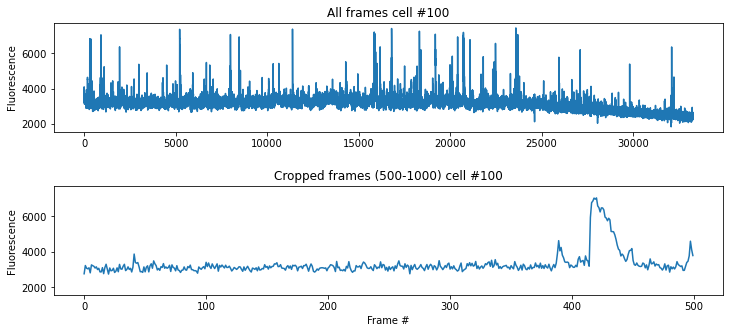

In [8]:
%matplotlib inline
fig, axs = plt.subplots(2,1,figsize=(12,5),sharey=True)

session_ind = 0
cell_ind = 100
cropped_frames = [500,1000]

F = data.signals.multi_session.F
# plot all frames of one cell.
axs[0].plot(F[session_ind][cell_ind,:])
# plot subselection of frames.
axs[1].plot(F[session_ind][cell_ind,cropped_frames[0]:cropped_frames[1]])

# formatting
axs[0].set_ylabel('Fluorescence')
axs[1].set_xlabel('Frame #')
axs[1].set_ylabel('Fluorescence')
axs[0].set_title(f"All frames cell #{cell_ind}")
axs[1].set_title(f'Cropped frames ({cropped_frames[0]}-{cropped_frames[1]}) cell #{cell_ind}')
plt.subplots_adjust(hspace = .5)